In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from collections import OrderedDict
import xgboost as xgb

In [3]:
raw_df = pd.read_csv('./data/all_data_CLEAN.csv', index_col=0)

data = raw_df.copy()
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [4]:
ord_colnames = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
ord_dict = {}
ord_dict['LotShape'] = ['IR3', 'IR2', 'IR1', 'Reg']
ord_dict['LandSlope'] = ['Sev', 'Mod', 'Gtl']
ord_dict['OverallQual'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['OverallCond'] = [np.nan, 1,2,3,4,5,6,7,8,9,10]
ord_dict['ExterQual'] = [np.nan,'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['ExterCond'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['BsmtExposure'] = ['NoneListed', 'No', 'Mn', 'Av', 'Gd']
ord_dict['BsmtFinType1'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['BsmtFinType2'] = ['NoneListed', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_dict['HeatingQC'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['KitchenQual'] = [np.nan, 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Functional'] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ord_dict['FireplaceQu'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageFinish'] = ['NoneListed', 'Unf', 'RFn', 'Fin']
ord_dict['GarageQual'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['GarageCond'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['PoolQC'] = ['NoneListed', 'Po', 'Fa','TA', 'Gd', 'Ex']
ord_dict['Fence'] = ['NoneListed', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

In [5]:
# Trasforms Labels to Numbers
for i in range(len(ord_colnames)):
    data[ord_colnames[i]] = data[ord_colnames[i]].apply(lambda x: ord_dict[ord_colnames[i]].index(x))

# Trasforms Numbers back to Labels
# for i in range(len(ord_colnames)):
#     ames_housing_X[ord_colnames[i]] = ames_housing_X[ord_colnames[i]].apply(lambda x: ord_dict[ord_colnames[i]][x])

In [6]:
nums = ['PID', 'SalePrice','SalePricePerGLA','GrLivArea','LotFrontage', 'LotArea', 
          'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
          'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF', 
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 
          'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt', 'GarageCars', 
          'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 
          'ScreenPorch', 'PoolArea', 'MiscVal' , 'MoSold', 'YrSold']


In [7]:
cats_ords = list(set(data.columns) - set(data[nums].columns))

cats = list(set(data[cats_ords].columns) - set(data[ord_colnames].columns))
print("Nums len: ", len(nums),
      "\nOrds len: ", len(ord_colnames),
      "\nCats len: ", len(cats),
      "\nRaw_df shape: ", len(raw_df.columns))

enc_cats_df = pd.get_dummies(data[cats],drop_first=True)
nums_df = data[nums]
ords_df = data[ord_colnames]

nums_ords = nums_df.join(ords_df)
full_df = nums_ords.join(enc_cats_df)
print("full_df: ", full_df.shape)

Nums len:  36 
Ords len:  20 
Cats len:  25 
Raw_df shape:  81
full_df:  (2552, 219)


In [8]:
y_SP = full_df['SalePrice']
y_SPPGLA = full_df['SalePricePerGLA']
X_GLA = full_df['GrLivArea']
X_PID = full_df['PID']

print("With SP, GLA, and SPPGLA and PID: ", full_df.shape)
full_df.drop(['SalePrice', 'SalePricePerGLA', 'GrLivArea', 'PID'], axis=1, inplace=True)
print("Without SP, GLA, SPPGLA, or PID: ", full_df.shape)

# Test data set sizes
print("full_df shape: ",full_df.shape, "\ny_SPPGLA shape: ",y_SPPGLA.shape)

With SP, GLA, and SPPGLA and PID:  (2552, 219)
Without SP, GLA, SPPGLA, or PID:  (2552, 215)
full_df shape:  (2552, 215) 
y_SPPGLA shape:  (2552,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(full_df, y_SPPGLA, test_size=0.25, random_state=42)

params = {'objective':'reg:squarederror',
          'colsample_bytree': 1,
          'gamma': 0.5,
          'learning_rate': 0.05,
          'max_depth': 3,
          'min_child_weight': 10,
          'n_estimators': 1000,
          'reg_alpha': 1,
          'reg_lambda': 3,
          'subsample': 0.4
         }

best_xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                               colsample_bytree = 1,
                               gamma = 0.5,
                               learning_rate = 0.05,
                               max_depth = 3,
                               min_child_weight = 10,
                               n_estimators = 1000,
                               reg_alpha = 1,
                               reg_lambda = 3,
                               subsample = 0.4)

In [10]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_xgbr, X_train, y_train, cv=kfold)


C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pengu\Anaco

In [11]:
print("Mean cross-validation score is %.5f with std of %.5f" % (scores.mean(), scores.std()))

Mean cross-validation score is 0.84867 with std of 0.01854


In [12]:
best_xgbr.fit(X_train, y_train)
#best_xgbr.score(X_train, y_train)
#best_xgbr.fit(X_test,y_test)
best_xgbr.score(X_test, y_test)

C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8192578720854865

In [14]:
# data_dmatrix = xgb.DMatrix(data=X_train, label = y_train)

# xg_reg = xgb.train(params=params, dtrain = data_dmatrix, num_boost_round=1000)

# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [15,10]
# plt.show()

C:\Users\pengu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [16]:
#%%capture
rel_features_dict = OrderedDict(sorted(best_xgbr.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=False))
rel_features = pd.DataFrame.from_dict(rel_features_dict,orient='index', columns = ['Weight'])

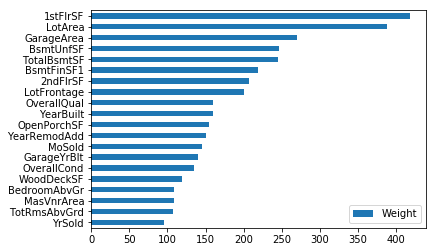

In [17]:
rel_features.tail(20).plot.barh()
plt.show()

In [26]:
unchangeable_feats = ([feat for feat in list(rel_features.index) if 'Neighborhood' in feat] +
 [feat for feat in list(rel_features.index) if 'Condition1' in feat] +
 [feat for feat in list(rel_features.index) if 'Condition2' in feat] +
 [feat for feat in list(rel_features.index) if 'Exterior1st' in feat] +
 [feat for feat in list(rel_features.index) if 'MSSubClass' in feat] +
 [feat for feat in list(rel_features.index) if 'SaleCondition' in feat] +
 [feat for feat in list(rel_features.index) if 'GarageType' in feat] +
 [feat for feat in list(rel_features.index) if 'LandContour' in feat] +
 [feat for feat in list(rel_features.index) if 'MSZoning' in feat] +
 [feat for feat in list(rel_features.index) if 'HouseStyle' in feat] +
 [feat for feat in list(rel_features.index) if 'Foundation' in feat] +
 [feat for feat in list(rel_features.index) if 'LotConfig' in feat] +
 ['LotShape'] + ['ExterQual'] + ['const'] + ['YearBuilt'] + ['2ndFlrSF'] +
 ['GarageArea '] + ['BedroomAbvGr'] + ['LotArea'] + ['LotFrontage'] + ['GarageYrBlt'] +
 ['MoSold'] + ['YrSold'] + ['LandSlope'] + ['1stFlrSF'] + ['BsmtUnfSF'] + ['TotalBsmtSF'] +
 ['LotFrontage'] + ['GarageArea'] + ['TotRmsAbvGrd'])

#unchangeable_feats
changeable_feats = list(set(rel_features.index) - set(unchangeable_feats))
#changeable_feats

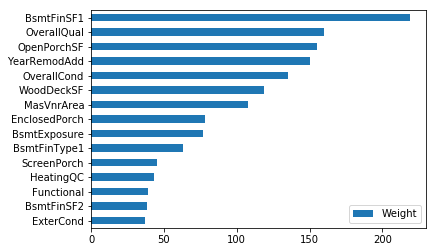

In [27]:
chng_rel_feats = rel_features[rel_features.index.isin(changeable_feats)]
#chng_rel_feats
chng_rel_feats.tail(15).plot.barh()
plt.show()

In [28]:
chng_rel_feats.tail(15)

,Weight
ExterCond,37
BsmtFinSF2,38
Functional,39
HeatingQC,43
ScreenPorch,45
BsmtFinType1,63
BsmtExposure,77
EnclosedPorch,78
MasVnrArea,108
WoodDeckSF,119
